## Implementation of ANN using basic libraries
## BY: Muhammad Hassan
## REG NO: 2023-BS-AI-176

## Importing Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(42)

## Loading images and Preprocessing them

In [44]:
def load_images(folder, label):
    data = []
    labels = []

    for file in os.listdir(folder):
        img = plt.imread(os.path.join(folder, file))

        if len(img.shape) == 3:
            img = img.mean(axis=2)

        img = img / 255.0
        data.append(img.flatten())
        labels.append(label)

    return data, labels


In [45]:
circle_data, circle_labels = load_images('simple_cv_dataset/train/circle', 0)
square_data, square_labels = load_images('simple_cv_dataset/train/square', 1)

X = np.array(circle_data + square_data)
y = np.array(circle_labels + square_labels).reshape(-1,1)

print("Training Data:", X.shape)


Training Data: (100, 4096)


## Activation Functions

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(a):
    return a*(1-a)


## Initialize Parameters

In [47]:
def initialize_params(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)*0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)*0.01
    b2 = np.zeros((1, output_size))
    return W1,b1,W2,b2


## Forward Propagation

In [48]:
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(X,W1)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1,W2)+b2
    A2 = sigmoid(Z2)
    return A2,(Z1,A1,Z2,A2)


## Loss Function

In [49]:
def compute_loss(y,y_hat):
    m=y.shape[0]
    return -(1/m)*np.sum(y*np.log(y_hat+1e-8)+(1-y)*np.log(1-y_hat+1e-8))


## Backward Propagation

In [50]:
def backward(X,y,W2,cache):
    Z1,A1,Z2,A2=cache
    m=X.shape[0]

    dZ2=A2-y
    dW2=(1/m)*np.dot(A1.T,dZ2)
    db2=(1/m)*np.sum(dZ2,axis=0,keepdims=True)

    dA1=np.dot(dZ2,W2.T)
    dZ1=dA1*sigmoid_derivative(A1)
    dW1=(1/m)*np.dot(X.T,dZ1)
    db1=(1/m)*np.sum(dZ1,axis=0,keepdims=True)

    return dW1,db1,dW2,db2


## Training Function

In [51]:
def train(X,y,hidden_size=32,epochs=100,lr=0.1):
    input_size=X.shape[1]
    W1,b1,W2,b2=initialize_params(input_size,hidden_size,1)

    for epoch in range(epochs):
        y_hat,cache=forward(X,W1,b1,W2,b2)
        loss=compute_loss(y,y_hat)

        dW1,db1,dW2,db2=backward(X,y,W2,cache)

        W1-=lr*dW1
        b1-=lr*db1
        W2-=lr*dW2
        b2-=lr*db2

        if epoch%10==0:
            print("Epoch:",epoch,"Loss:",loss)

    return W1,b1,W2,b2


## Train Model

In [52]:
W1,b1,W2,b2=train(X,y)


Epoch: 0 Loss: 0.6931696513120926
Epoch: 10 Loss: 0.6931475967259391
Epoch: 20 Loss: 0.6931473103570286
Epoch: 30 Loss: 0.6931471570780103
Epoch: 40 Loss: 0.6931470046129363
Epoch: 50 Loss: 0.693146852139783
Epoch: 60 Loss: 0.6931466996401267
Epoch: 70 Loss: 0.6931465471004518
Epoch: 80 Loss: 0.6931463945072701
Epoch: 90 Loss: 0.6931462418470897


## Prediction

In [53]:
def predict(X,W1,b1,W2,b2):
    y_hat,_=forward(X,W1,b1,W2,b2)
    return (y_hat>0.5).astype(int)


In [54]:
test_circle_data,_=load_images('simple_cv_dataset/test/circle',0)
test_square_data,_=load_images('simple_cv_dataset/test/square',1)

X_test=np.array(test_circle_data+test_square_data)
y_test=np.array([0]*len(test_circle_data)+[1]*len(test_square_data)).reshape(-1,1)

preds=predict(X_test,W1,b1,W2,b2)
print("Test accuracy :",np.mean(preds==y_test))


Test accuracy : 1.0


Prediction for circle_0.png: CIRCLE


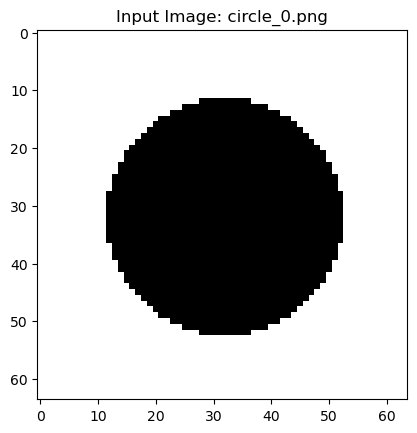

Prediction for square_6.png: SQUARE


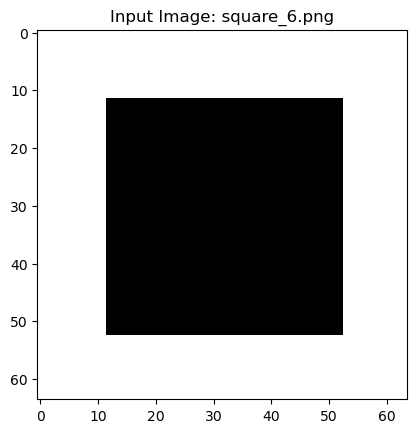

In [60]:
image_files = ["circle_0.png", "square_6.png"]

for img_file in image_files:
    img = plt.imread(img_file)
    
    if len(img.shape) == 3:
        img = img.mean(axis=2)
    
    img = img / 255.0
    img_flat = img.flatten().reshape(1, -1)
    
    pred = predict(img_flat, W1, b1, W2, b2)
    
    if pred[0][0] == 0:
        print(f"Prediction for {img_file}: CIRCLE")
    else:
        print(f"Prediction for {img_file}: SQUARE")
    
    plt.imshow(img.reshape(int(np.sqrt(img_flat.shape[1])), -1), cmap="gray")
    plt.title(f"Input Image: {img_file}")
    plt.show()


### THATS ALL, THANK YOU !!!
### BY: Muhammad Hassan 
### Registeration Number: 223-ns-ai-176